In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pesurrcampusmihackathoncompetitiona/sample_submission.csv
/kaggle/input/pesurrcampusmihackathoncompetitiona/train.csv
/kaggle/input/pesurrcampusmihackathoncompetitiona/test.csv


In [42]:
train = pd.read_csv("/kaggle/input/pesurrcampusmihackathoncompetitiona/train.csv", index_col = 0)
test = pd.read_csv("/kaggle/input/pesurrcampusmihackathoncompetitiona/test.csv", index_col = 0)
sample_sub=pd.read_csv("/kaggle/input/pesurrcampusmihackathoncompetitiona/sample_submission.csv",index_col=0)

In [43]:
train.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,4463.253268,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,2657.114446,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,4320.802847,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,4502.841233,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,4473.191669,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [44]:
missing_values = train.isna()
missing_count = train.isna().sum()
missing_count

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

In [45]:
print(train.describe()) 
print(train.info())

        length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   8991.0       8991.000000      8991.000000  8991.000000  8.991000e+03   
mean   66149.0          0.379429         0.084906     0.131079  2.692355e-03   
std        0.0          0.090370         0.009649     0.068530  3.609881e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315718         0.079894     0.083768  6.191782e-04   
50%    66149.0          0.384857         0.085147     0.121635  1.496367e-03   
75%    66149.0          0.442305         0.091105     0.176834  3.168995e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             8991.000000           8.991000e+03              8991.000000   
mean              2202.499294           4.180213e+05              2243.675807   
std                755.453076       

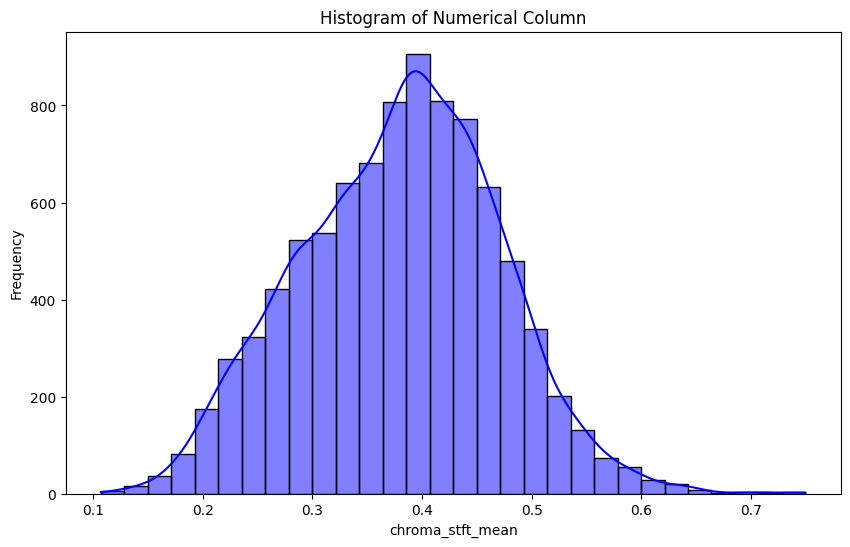

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(train['chroma_stft_mean'], kde=True, bins=30, color='blue')
plt.title('Histogram of Numerical Column')
plt.xlabel('chroma_stft_mean')
plt.ylabel('Frequency')
plt.show()

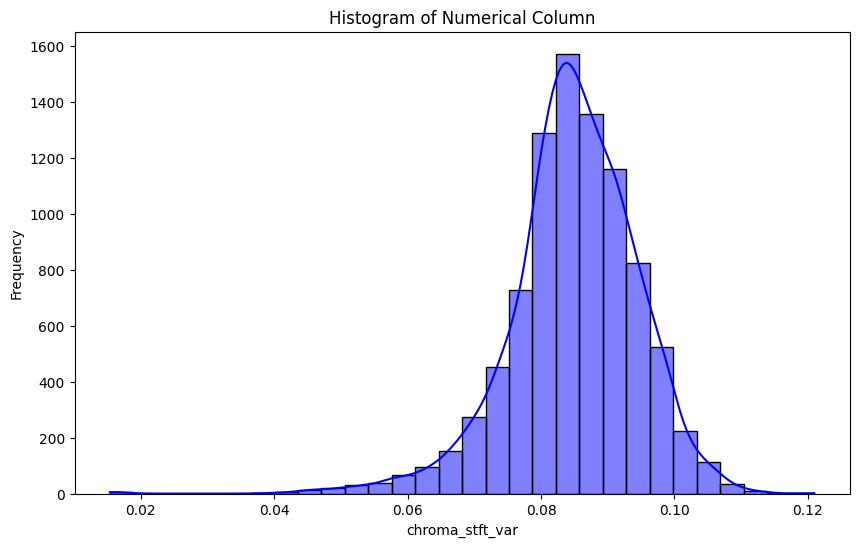

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(train['chroma_stft_var'], kde=True, bins=30, color='blue')
plt.title('Histogram of Numerical Column')
plt.xlabel('chroma_stft_var')
plt.ylabel('Frequency')
plt.show()

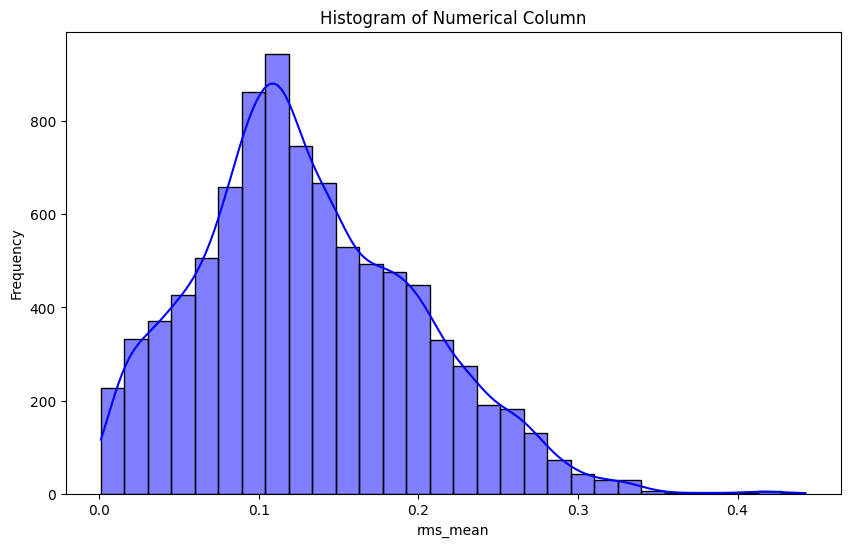

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(train['rms_mean'], kde=True, bins=30, color='blue')
plt.title('Histogram of Numerical Column')
plt.xlabel('rms_mean')
plt.ylabel('Frequency')
plt.show()

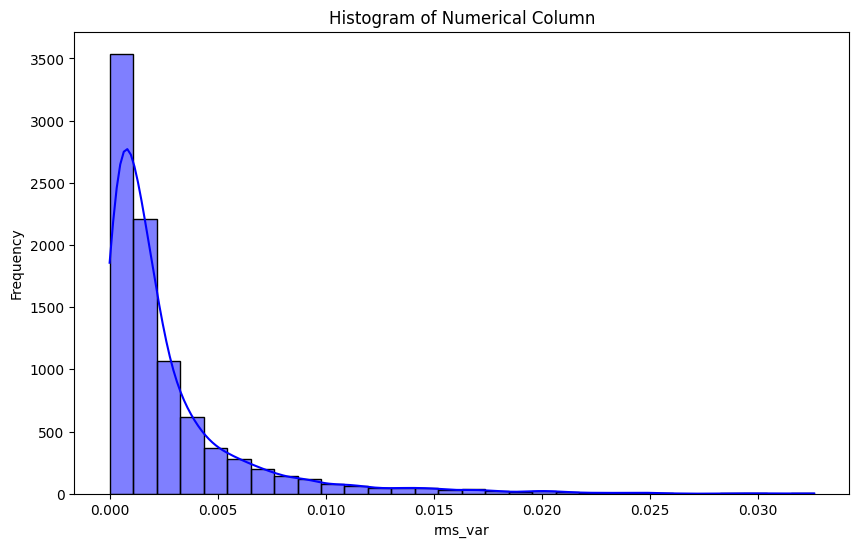

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(train['rms_var'], kde=True, bins=30, color='blue')
plt.title('Histogram of Numerical Column')
plt.xlabel('rms_var')
plt.ylabel('Frequency')
plt.show()

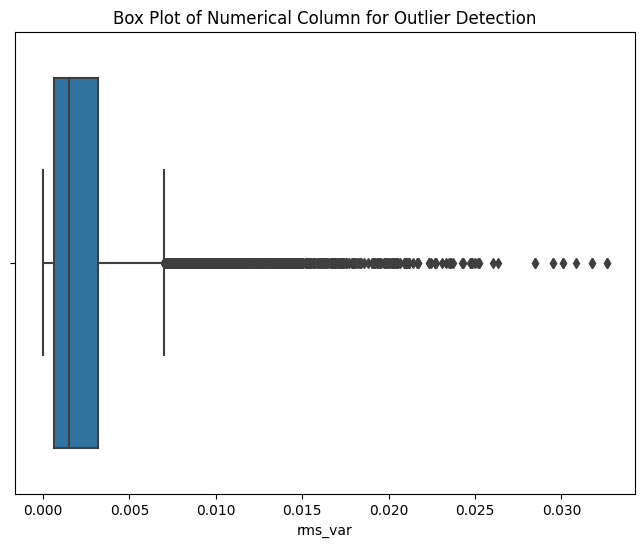

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['rms_var'])
plt.title('Box Plot of Numerical Column for Outlier Detection')
plt.show()

Removal of outliers

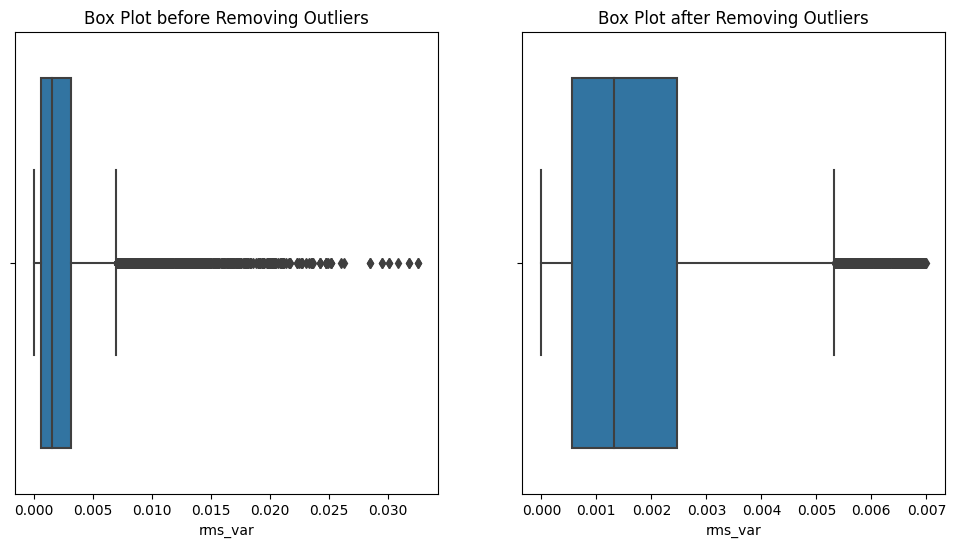

                   length  chroma_stft_mean  chroma_stft_var  rms_mean  \
filename                                                                 
jazz.00038.9.wav    66149          0.254604         0.090115  0.075960   
disco.00055.3.wav   66149          0.488070         0.065943  0.119709   
rock.00025.9.wav    66149          0.440747         0.071972  0.108535   
jazz.00013.4.wav    66149          0.369718         0.090648  0.052010   
blues.00054.0.wav   66149          0.482166         0.072051  0.197841   

                    rms_var  spectral_centroid_mean  spectral_centroid_var  \
filename                                                                     
jazz.00038.9.wav   0.002236             1439.715643           68955.697954   
disco.00055.3.wav  0.001558             2049.831819          132030.817465   
rock.00025.9.wav   0.001491             2237.056815          129862.001264   
jazz.00013.4.wav   0.000124             1775.591113           66645.168399   
blues.00054.0

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=train['rms_var'])
plt.title('Box Plot before Removing Outliers')


Q1 = train['rms_var'].quantile(0.25)
Q3 = train['rms_var'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train = train[(train['rms_var'] > lower_bound) & (train['rms_var'] < upper_bound)]



#####################


plt.subplot(1, 2, 2)
sns.boxplot(x=train['rms_var'])
plt.title('Box Plot after Removing Outliers')

plt.show()

# Display the cleaned dataset
print(train.head())

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [58]:
train = pd.read_csv("/kaggle/input/pesurrcampusmihackathoncompetitiona/train.csv", index_col = 0)


In [59]:
train.reset_index(inplace=True)
label_encoder = LabelEncoder()
train['label'] = label_encoder.fit_transform(train['label'])
train['label'] = to_categorical(train['label'])
train = train.drop(['filename'], axis=1)

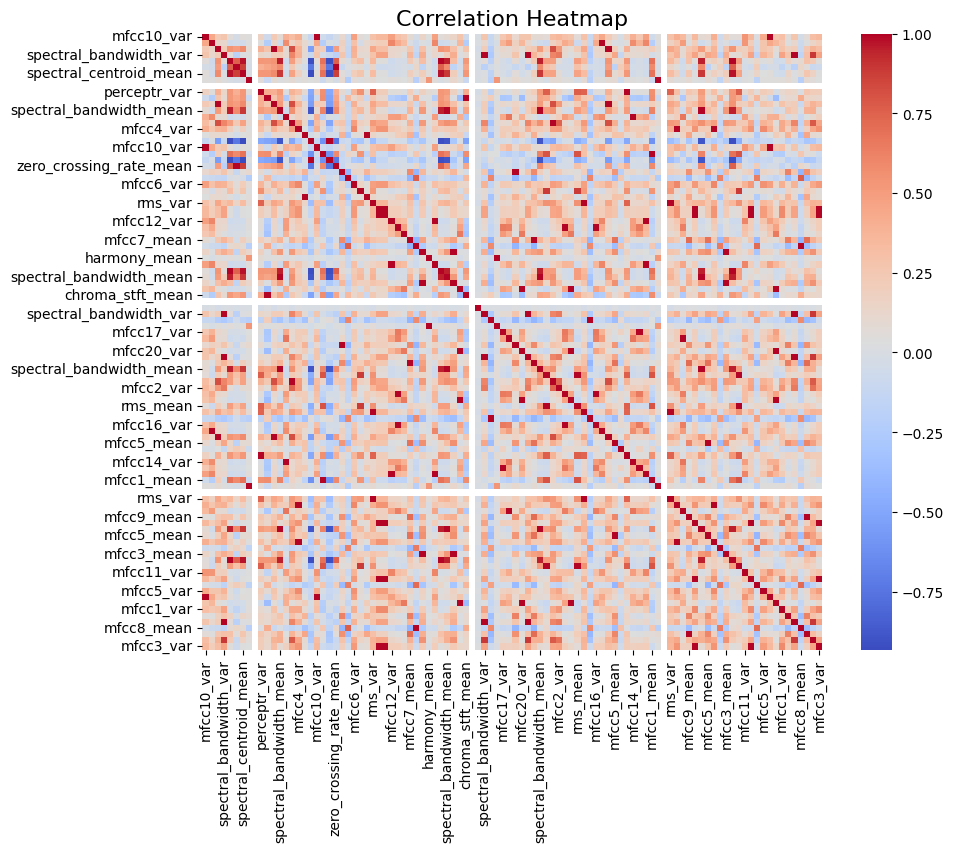

In [61]:
# # import pandas as pd
# # import seaborn as sns
# # import matplotlib.pyplot as plt
# # data = {'Feature1': [1, 2, 3, 4, 5],
# #         'Feature2': [5, 4, 3, 2, 1],
# #         'Feature3': [1, 1, 2, 2, 1]}

# # df = pd.DataFrame(data)
# train_sample = train.sample(n=100, random_state=1)
# cov_matrix = train.cov()

# # Plot the covariance heat map
# plt.figure(figsize=(8, 6))
# sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Covariance Heatmap', fontsize=16)
# plt.show()
#train.set_index('id',inplace=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
# correlation_matrix = train.corr()
sample_columns = train.sample(n=100, axis=1, random_state=1,replace=True)  # Adjust the sample size as needed

# Compute the correlation matrix
correlation_matrix = sample_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [62]:
feature_columns = train.columns
correlation_df = pd.DataFrame(columns=["Feature1", "Feature2", "Correlation Coefficient"])
correlation_threshold = 0.7  # Set your correlation threshold here
for i in range(len(feature_columns)):
    for j in range(i + 1, len(feature_columns)):  # Avoid comparing a feature with itself
        feature1 = feature_columns[i]
        feature2 = feature_columns[j]
        correlation_coefficient = train[feature1].corr(train[feature2])
        if abs(correlation_coefficient) >= correlation_threshold:
            correlation_df = pd.concat([correlation_df, pd.DataFrame([{"Feature1": feature1, "Feature2": feature2, "Correlation Coefficient": correlation_coefficient}])], ignore_index=True)
print(correlation_df)

                   Feature1                 Feature2  Correlation Coefficient
0                  rms_mean              harmony_var                 0.884155
1                  rms_mean             perceptr_var                 0.765097
2                  rms_mean               mfcc1_mean                 0.796498
3                   rms_var             perceptr_var                 0.746170
4    spectral_centroid_mean  spectral_bandwidth_mean                 0.890171
5    spectral_centroid_mean             rolloff_mean                 0.974266
6    spectral_centroid_mean  zero_crossing_rate_mean                 0.866802
7    spectral_centroid_mean               mfcc2_mean                -0.931320
8     spectral_centroid_var              rolloff_var                 0.778954
9     spectral_centroid_var   zero_crossing_rate_var                 0.819443
10    spectral_centroid_var                mfcc2_var                 0.747776
11  spectral_bandwidth_mean             rolloff_mean            

correlation ---> removing spectral_centroid_mean,spectral_bandwidth_mean

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from keras import layers, callbacks
from keras.regularizers import l2
from keras.optimizers import RMSprop

train_data = pd.read_csv('/kaggle/input/pesurrcampusmihackathoncompetitiona/train.csv')

X = train_data.drop(['filename','spectral_centroid_mean','spectral_bandwidth_mean', 'label',], axis=1)
y = train_data['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define a more complex neural network (ANN)
model = keras.Sequential([
    layers.Dense(512, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)),
    layers.Dense(10, activation='softmax')
])
optimizer = RMSprop(learning_rate=0.001, clipvalue=0.5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


lr_annealer = callbacks.ReduceLROnPlateau(factor=0.1, patience=3)

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=150, batch_size=32,
          validation_data=(X_val, y_val), callbacks=[lr_annealer, early_stopping])

#test_data = pd.read_csv('/kaggle/input/pesurrcampusmihackathoncompetitiona/test.csv')


Epoch 1/150
225/225 [==============================] - 4s 8ms/step - loss: 3.3621 - accuracy: 0.4643 - val_loss: 2.6770 - val_accuracy: 0.6787 - lr: 0.0010
Epoch 2/150
225/225 [==============================] - 1s 7ms/step - loss: 2.7185 - accuracy: 0.6157 - val_loss: 2.3160 - val_accuracy: 0.7365 - lr: 0.0010
Epoch 3/150
225/225 [==============================] - 2s 7ms/step - loss: 2.3796 - accuracy: 0.6671 - val_loss: 2.0572 - val_accuracy: 0.7510 - lr: 0.0010
Epoch 4/150
225/225 [==============================] - 1s 7ms/step - loss: 2.1390 - accuracy: 0.6870 - val_loss: 1.8388 - val_accuracy: 0.7827 - lr: 0.0010
Epoch 5/150
225/225 [==============================] - 2s 7ms/step - loss: 1.9266 - accuracy: 0.7168 - val_loss: 1.6727 - val_accuracy: 0.7971 - lr: 0.0010
Epoch 6/150
225/225 [==============================] - 2s 7ms/step - loss: 1.7443 - accuracy: 0.7382 - val_loss: 1.5103 - val_accuracy: 0.8271 - lr: 0.0010
Epoch 7/150
225/225 [==============================] - 2s 7ms/st